In [99]:
!pip freeze > requirements.txt

In [95]:
#import streamlit as st
import pandas as pd
import numpy as np
#from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#from pylab import rcParams
#from imblearn.combine import SMOTEENN, SMOTETomek
#from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import IsolationForest
#from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('/content/drive/MyDrive/cars24/data.xlsx', sheet_name = 1)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#distribution of Target label
df.rating_engineTransmission.value_counts()

In [ ]:
sns.countplot(df.odometer_reading)

In [ ]:
df.engineTransmission_engineOil.value_counts()

In [ ]:
df.engineTransmission_engineOil_cc_value_0.value_counts()

In [ ]:
#Creating a sparse feature frame with feature names as the fault/issue/problems in each parameter with value 0 or 1 


def check(val,i, s, e):
  if val in df.iloc[i][s:e].values:
    return 1
  else:
    return 0


def create(data, s, e):
  a = pd.Series.to_frame(data[col[s + 1]].value_counts()).index
  print(f'{len(a)} new feature/s formed')
  z = {}
  for i in range(data.shape[0]):
    z[i] = {}
    for ind in a:
      z[i][ind] = check(ind, i, s, e+1)
  data = pd.concat([data, pd.DataFrame.from_dict(z).transpose()], axis=1)
  #data = data.drop([x for x in a], axis = 1)
  return data



data = create(df, 4, 9)
data = create(data, 10, 11)
data = create(data, 12, 22)
data = create(data, 23, 34)
data = create(data, 35, 39)
data = create(data, 40, 41)
data = create(data, 42, 48)
data = create(data, 49, 50)
data = create(data, 51, 52)
data = create(data, 53, 60)
data = create(data, 61, 64)
data = create(data, 65, 69)
col = data.columns
data.columns = [(str(i) + col[i]) for i in range(len(col))]

In [ ]:
#Dropping remaining columns

ctd = ['engineTransmission_battery_value',
       'engineTransmission_battery_cc_value_0',
       'engineTransmission_battery_cc_value_1',
       'engineTransmission_battery_cc_value_2',
       'engineTransmission_battery_cc_value_3',
       'engineTransmission_battery_cc_value_4',
       'engineTransmission_engineoilLevelDipstick_value',
       'engineTransmission_engineOilLevelDipstick_cc_value_0',
       'engineTransmission_engineOil',
       'engineTransmission_engineOil_cc_value_0',
       'engineTransmission_engineOil_cc_value_1',
       'engineTransmission_engineOil_cc_value_2',
       'engineTransmission_engineOil_cc_value_3',
       'engineTransmission_engineOil_cc_value_4',
       'engineTransmission_engineOil_cc_value_5',
       'engineTransmission_engineOil_cc_value_6',
       'engineTransmission_engineOil_cc_value_7',
       'engineTransmission_engineOil_cc_value_8',
       'engineTransmission_engineOil_cc_value_9',
       'engineTransmission_engine_value',
       'engineTransmission_engine_cc_value_0',
       'engineTransmission_engine_cc_value_1',
       'engineTransmission_engine_cc_value_2',
       'engineTransmission_engine_cc_value_3',
       'engineTransmission_engine_cc_value_4',
       'engineTransmission_engine_cc_value_5',
       'engineTransmission_engine_cc_value_6',
       'engineTransmission_engine_cc_value_7',
       'engineTransmission_engine_cc_value_8',
       'engineTransmission_engine_cc_value_9',
       'engineTransmission_engine_cc_value_10',
       'engineTransmission_coolant_value',
       'engineTransmission_coolant_cc_value_0',
       'engineTransmission_coolant_cc_value_1',
       'engineTransmission_coolant_cc_value_2',
       'engineTransmission_coolant_cc_value_3',
       'engineTransmission_engineMounting_value',
       'engineTransmission_engineMounting_cc_value_0',
       'engineTransmission_engineSound_value',
       'engineTransmission_engineSound_cc_value_0',
       'engineTransmission_engineSound_cc_value_1',
       'engineTransmission_engineSound_cc_value_2',
       'engineTransmission_engineSound_cc_value_3',
       'engineTransmission_engineSound_cc_value_4',
       'engineTransmission_engineSound_cc_value_5',
       'engineTransmission_exhaustSmoke_value',
       'engineTransmission_exhaustSmoke_cc_value_0',
       'engineTransmission_engineBlowByBackCompression_value',
       'engineTransmission_engineBlowByBackCompression_cc_value_0',
       'engineTransmission_clutch_value',
       'engineTransmission_clutch_cc_value_0',
       'engineTransmission_clutch_cc_value_1',
       'engineTransmission_clutch_cc_value_2',
       'engineTransmission_clutch_cc_value_3',
       'engineTransmission_clutch_cc_value_4',
       'engineTransmission_clutch_cc_value_5',
       'engineTransmission_clutch_cc_value_6',
       'engineTransmission_gearShifting_value',
       'engineTransmission_gearShifting_cc_value_0',
       'engineTransmission_gearShifting_cc_value_1',
       'engineTransmission_gearShifting_cc_value_2', 'engineTransmission_comments_value_0', 'engineTransmission_comments_value_1',
       'engineTransmission_comments_value_2', 'engineTransmission_comments_value_3', 'engineTransmission_comments_value_4']

data.drop(ctd, axis = 1, inplace = True)

In [86]:
#data.to_csv('/content/drive/MyDrive/cars24/processed_data.csv')
data = pd.read_csv('/content/drive/MyDrive/cars24/processed_data.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
col = data.columns
data.columns = [(str(i) + col[i]) for i in range(len(col))]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 76 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   0appointmentId                                   26307 non-null  object 
 1   1inspectionStartTime                             26307 non-null  object 
 2   2year                                            26307 non-null  int64  
 3   3month                                           26307 non-null  int64  
 4   4fuel_type                                       26307 non-null  object 
 5   5odometer_reading                                26307 non-null  int64  
 6   6rating_engineTransmission                       26307 non-null  float64
 7   7Weak                                            26307 non-null  int64  
 8   8Changed                                         26307 non-null  int64  
 9   9Jump Start                 

[Text(0, 0.5, 'Fault score'), Text(0.5, 0, 'Ratings')]

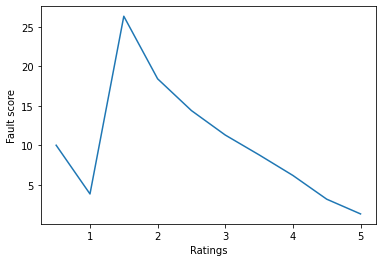

In [88]:
ctsum = data.columns[7:]
data['score'] = data[ctsum].sum(axis = 1)
ratings = data['6rating_engineTransmission'].unique()
afs = []
for val in ratings:
  afs.append(data[data['6rating_engineTransmission'] == val]['score'].mean())

sns.lineplot(x = ratings, y = afs).set(xlabel="Ratings", ylabel = "Fault score")

In [89]:
#age variable
data['1inspectionStartTime'] = pd.to_datetime(data['1inspectionStartTime'])
data['i_year'] = data['1inspectionStartTime'].apply(lambda x : x.year)
data['age'] = data['i_year'] - data['2year'] 


#standarization
cts = ['age', '5odometer_reading']
scaler = StandardScaler()
data[cts] = scaler.fit_transform(data[cts])

In [ ]:
data.describe()

In [90]:
#encoding label and other nominal feature
encode = LabelEncoder()
data['6rating_engineTransmission'] = encode.fit_transform(data['6rating_engineTransmission'])
data['4fuel_type'] = encode.fit_transform(data['4fuel_type'])


#Features and variables
ctd = ['0appointmentId', 'i_year', '2year', '1inspectionStartTime', '3month', '6rating_engineTransmission']
X = data.drop(columns = ctd, axis = 1)
y = data['6rating_engineTransmission']

In [77]:
data.shape

(26163, 79)

In [82]:
#Features and variables
ctd = ['0appointmentId', 'i_year', '2year', '1inspectionStartTime', '3month', '6rating_engineTransmission']
X = data.drop(columns = ctd, axis = 1)
y = data['6rating_engineTransmission']

In [91]:
#populating the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('before populating:')
print(f'train label: {Counter(y_train)}')
print(f'test label: {Counter(y_test)}')

oss = RandomOverSampler()

X_train,y_train = oss.fit_resample(X_train,y_train)
print('after populating:')
print(f'train label: {Counter(y_train)}')
print(f'test label: {Counter(y_test)}')

before populating:
train label: Counter({7: 8125, 6: 4791, 5: 3463, 8: 1776, 9: 1272, 1: 1166, 4: 349, 3: 100, 2: 3})
test label: Counter({7: 2027, 6: 1153, 5: 916, 8: 433, 9: 351, 1: 290, 4: 71, 3: 17, 2: 3, 0: 1})
after populating:
train label: Counter({6: 8125, 8: 8125, 7: 8125, 9: 8125, 5: 8125, 4: 8125, 3: 8125, 1: 8125, 2: 8125})
test label: Counter({7: 2027, 6: 1153, 5: 916, 8: 433, 9: 351, 1: 290, 4: 71, 3: 17, 2: 3, 0: 1})


In [92]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [93]:
def model_evaluation(df):
  col = df.columns
  for c in col:
    sns.lineplot(x = df.index, y = df[c], label = c)

Accuracy on Train Data : 0.5994803418803418
Accuracy on Test Data: 0.40060813378943366
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.93      0.80       290
           2       0.00      0.00      0.00         3
           3       0.02      0.35      0.04        17
           4       0.06      0.34      0.11        71
           5       0.36      0.28      0.31       916
           6       0.37      0.29      0.32      1153
           7       0.60      0.34      0.44      2027
           8       0.24      0.52      0.33       433
           9       0.57      0.85      0.69       351

    accuracy                           0.40      5262
   macro avg       0.29      0.39      0.30      5262
weighted avg       0.47      0.40      0.41      5262



,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,271,0,3,4,3,5,2,2,0
2,0,0,0,3,0,0,0,0,0,0
3,0,3,0,6,3,4,1,0,0,0
4,0,3,0,19,24,14,6,4,1,0
5,0,31,1,129,154,252,198,119,28,4
6,0,26,0,76,112,209,335,275,113,7
7,0,52,0,29,80,206,344,696,527,93
8,0,4,0,1,2,6,23,55,225,117
9,0,1,0,0,0,0,0,4,47,299


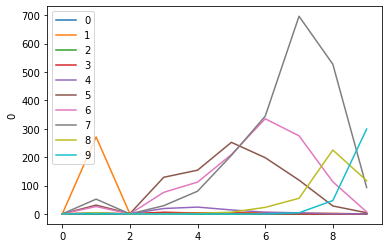

In [94]:
#Logistic Regression
clf_d = LogisticRegression(random_state=0)
clf_d.fit(X_train, y_train)
print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
y_pred = clf_d.predict(X_test)
#yp = [round(x) if 0 < round(x) < 9 else 0 for x in y_pred ]
print(classification_report(y_test, y_pred))
model_evaluation(pd.DataFrame(confusion_matrix(y_test, y_pred)).transpose())
pd.DataFrame(confusion_matrix(y_test, y_pred))

In [96]:
filename = 'logistic_regression.sav'
pickle.dump(clf_d, open(filename, 'wb'))

Accuracy on Train Data : 0.6571350427350428
Accuracy on Test Data: 0.40935005701254273
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      0.95      0.87       290
           2       0.00      0.00      0.00         3
           3       0.02      0.29      0.04        17
           4       0.05      0.32      0.08        71
           5       0.38      0.28      0.32       916
           6       0.38      0.39      0.38      1153
           7       0.64      0.30      0.40      2027
           8       0.27      0.59      0.37       433
           9       0.65      0.84      0.74       351

    accuracy                           0.41      5262
   macro avg       0.32      0.40      0.32      5262
weighted avg       0.51      0.41      0.42      5262



,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,275,0,5,4,0,4,1,0,1
2,0,0,0,3,0,0,0,0,0,0
3,0,2,0,5,5,4,1,0,0,0
4,0,0,1,22,23,17,6,2,0,0
5,0,17,2,115,190,255,235,69,32,1
6,0,18,0,71,137,179,444,206,92,6
7,0,25,0,37,114,208,448,601,527,67
8,0,2,0,0,3,5,26,61,255,81
9,0,0,0,0,0,1,1,2,51,296


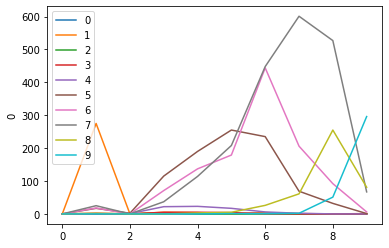

In [97]:
#model building using XGboost classifier
clf_d = xgboost.XGBClassifier()
clf_d.fit(X_train, y_train)
print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
y_pred = clf_d.predict(X_test)
#yp = [round(x) if 0 < round(x) < 9 else 0 for x in y_pred ]
print(classification_report(y_test, y_pred))
model_evaluation(pd.DataFrame(confusion_matrix(y_test, y_pred)).transpose())
pd.DataFrame(confusion_matrix(y_test, y_pred))

In [98]:
filename = 'xgboost.sav'
pickle.dump(clf_d, open(filename, 'wb'))

In [ ]:
  #XGBoost
#hyper-parameter Tuning

#Providing a list of values for some xgboost model parameter
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [10, 18, 29, 41, 52, 63, 70],
    'min_child_weight': [1, 2],                            
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200,400,600,800, 900, 1000],
    'scale_pos_weight': [1, 5, 10, 20, 25, 50, 75, 100]
}


model = xgboost.XGBClassifier()                #Defining the model

#Defining the Randomized search Cv function with its own parameter and evaluation metrix
random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 30, 
                                   scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

random_search.fit(X_train,y_train)             #fitting the random search model

random_search.best_estimator_                  #getting the best parameter value for xg boost
clf_d = random_search.best_estimator_

clf_d.fit(X_train, y_train)
print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
y_pred = clf_d.predict(X_test)
print(classification_report(y_test, y_pred))
model_evaluation(pd.DataFrame(confusion_matrix(y_test, y_pred)).transpose())
pd.DataFrame(confusion_matrix(y_test, y_pred))

In [65]:
#checking for mislabelled

rkf = RepeatedKFold(n_splits=2,n_repeats=25, random_state=None)
#X = X.values
#y = y.values
i = 0
record_df = data[['0appointmentId', 'age', 'score']].reset_index()
index_to_check =  []
clf_d = LogisticRegression()
for train_index, test_index in rkf.split(X):
  record = {}
  record['index'] = test_index
  print("Validation:", i)
  index_to_check.append(test_index)
  X_train, X_test = X[train_index], X[test_index] 
  y_train, y_test = y[train_index], y[test_index]
  clf_d.fit(X_train, y_train)
  print(f'Accuracy on Train Data : {clf_d.score(X_train, y_train)}')
  print(f'Accuracy on Test Data: {clf_d.score(X_test, y_test)}')
  y_pred = clf_d.predict(X_test)
  mislabelled = []
  for j in range(len(y_pred)):
    if y_pred[j] == y_test[j]:
      mislabelled.append(1)
    else:
      mislabelled.append(-1)
  record['mislabelled' + str(i)] = mislabelled
  mdf = pd.DataFrame.from_dict(record)
  record_df = pd.merge(record_df, mdf, on = 'index', how = 'left')
  i += 1

Validation: 0
Accuracy on Train Data : 0.5418535695278643
Accuracy on Test Data: 0.5297247985403679
Validation: 1
Accuracy on Train Data : 0.5375551163144291
Accuracy on Test Data: 0.5340226564281912
Validation: 2
Accuracy on Train Data : 0.5428419372006387
Accuracy on Test Data: 0.5316253611068876
Validation: 3
Accuracy on Train Data : 0.5392276113729664
Accuracy on Test Data: 0.532274005930206
Validation: 4
Accuracy on Train Data : 0.5429179654831597
Accuracy on Test Data: 0.5329937661547818
Validation: 5
Accuracy on Train Data : 0.5442450965485783
Accuracy on Test Data: 0.5336425150155858
Validation: 6
Accuracy on Train Data : 0.5403330038774424
Accuracy on Test Data: 0.5364147787745173
Validation: 7
Accuracy on Train Data : 0.5413562414474684
Accuracy on Test Data: 0.5296890443244887
Validation: 8
Accuracy on Train Data : 0.5422337109404699
Accuracy on Test Data: 0.5344381937053367
Validation: 9
Accuracy on Train Data : 0.5411281739394861
Accuracy on Test Data: 0.5347829392534023
V

In [66]:
record_df.fillna(0, inplace = True)

In [67]:
ind = record_df.columns[4:]
#record_df.info()
record_df['sum'] = record_df[ind].sum(axis = 1)

In [63]:
record_df

,index,0appointmentId,age,score,mislabelled0,mislabelled1,mislabelled2,mislabelled3,mislabelled4,mislabelled5,mislabelled6,mislabelled7,mislabelled8,mislabelled9,mislabelled10,mislabelled11,mislabelled12,mislabelled13,mislabelled14,mislabelled15,mislabelled16,mislabelled17,mislabelled18,mislabelled19,mislabelled20,mislabelled21,mislabelled22,mislabelled23,mislabelled24,mislabelled25,mislabelled26,mislabelled27,mislabelled28,mislabelled29,mislabelled30,mislabelled31,mislabelled32,mislabelled33,mislabelled34,mislabelled35,...,mislabelled161,mislabelled162,mislabelled163,mislabelled164,mislabelled165,mislabelled166,mislabelled167,mislabelled168,mislabelled169,mislabelled170,mislabelled171,mislabelled172,mislabelled173,mislabelled174,mislabelled175,mislabelled176,mislabelled177,mislabelled178,mislabelled179,mislabelled180,mislabelled181,mislabelled182,mislabelled183,mislabelled184,mislabelled185,mislabelled186,mislabelled187,mislabelled188,mislabelled189,mislabelled190,mislabelled191,mislabelled192,mislabelled193,mislabelled194,mislabelled195,mislabelled196,mislabelled197,mislabelled198,mislabelled199,sum
0,0,aj_01,0.758485,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,1,aj_02,1.024007,14,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-6.0
2,2,aj_03,-0.303604,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,3,aj_04,-0.569126,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0
4,4,aj_05,-0.038082,13,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,26302,aj_26303,-0.569126,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
26303,26303,aj_26304,1.024007,14,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-10.0
26304,26304,aj_26305,1.820574,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.

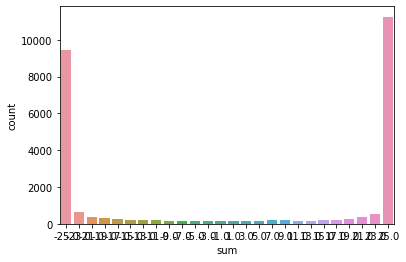

In [68]:
sns.countplot(record_df['sum'])

In [79]:
record_df['sum'].value_counts()

 25.0    11253
-25.0     9419
-23.0      640
 23.0      522
 21.0      371
-21.0      353
-19.0      297
 19.0      255
-17.0      251
 17.0      230
 15.0      210
-15.0      206
 9.0       194
-13.0      187
-11.0      182
 7.0       180
 11.0      179
 13.0      174
-9.0       159
 5.0       158
-7.0       153
-3.0       153
 1.0       152
 3.0       151
-5.0       144
-1.0       134
Name: sum, dtype: int64

In [80]:
itr = record_df[record_df['sum'] == -25].index
data.drop(itr, inplace = True)
data.shape

(16744, 79)

In [53]:
df = data.iloc[itr]

[Text(0, 0.5, 'Fault score'), Text(0.5, 0, 'Ratings')]

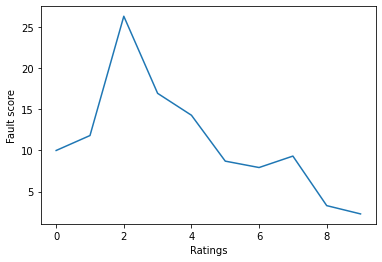

In [54]:
ratings = df['6rating_engineTransmission'].unique()
afs = []
for val in ratings:
  afs.append(df[df['6rating_engineTransmission'] == val]['score'].mean())

sns.lineplot(x = ratings, y = afs).set(xlabel="Ratings", ylabel = "Fault score")